# CS171 - Spring 2019 - Assignment 1
### Instructor: Vagelis Papalexakis

In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [2]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1: Data Visualization [20%]


### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

C:\Users\campo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


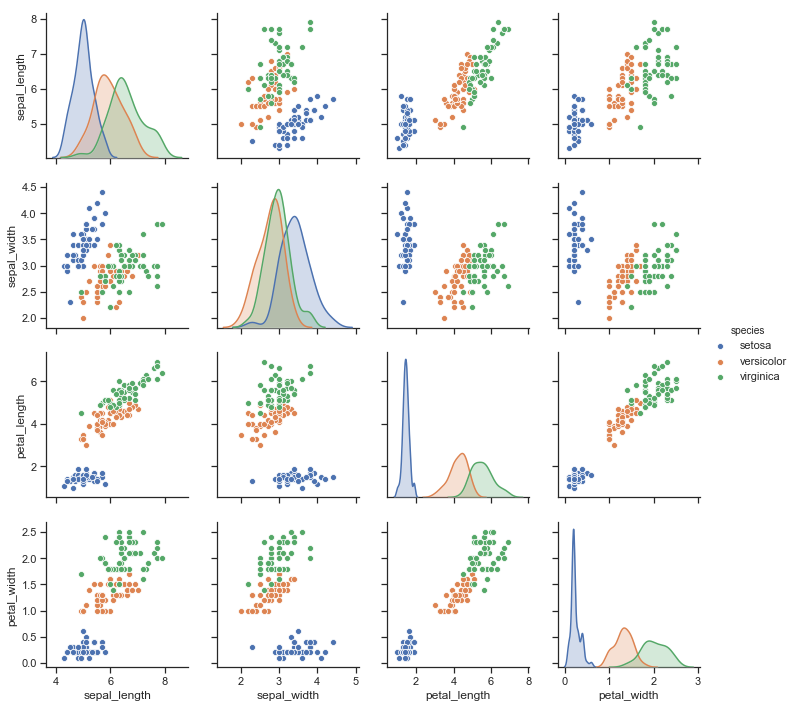

In [3]:
#Q1a problem #1
# Source code website : https://seaborn.pydata.org/generated/seaborn.pairplot.html
sb.set(style="ticks", color_codes=True)
iris = sb.load_dataset("iris")
g = sb.pairplot(iris,hue="species") 

Your answer here:
2. 
Versicolor and Viginica features are the most correlated to each other
3. 
The scatter plot is useful in determining outliers, relationships, capture linear models and etc.
We can classify flowers into categories based on features or structral components.
Some scatter plots have positive correlation. 

# Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

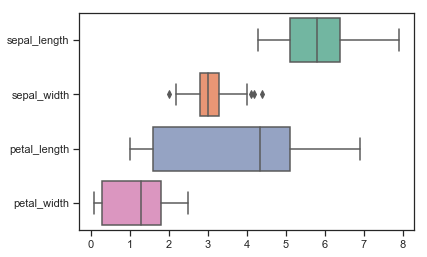

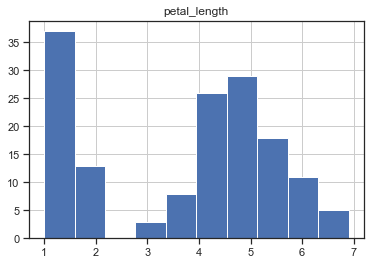

In [5]:
#Source code website : https://seaborn.pydata.org/generated/seaborn.boxplot.html 
ax = sb.boxplot(data=iris, orient="h", palette="Set2")
iris.hist('petal_length')
plt.show()

Your answer here:

3. 
The petal length box plot gives more information on the number of data points on the frequency y axis.
or example, roughly 37 data points are between 1 and 1.5 values.
There is two bars between 1 and 2.2 values.
The two bars can be cast as outliers depending on the data that we want.
I think there's a normal or negative skewed between 3 and 7 petal length values.

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [60]:
# Source code website : 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html#scipy.spatial.distance.minkowski
from scipy.spatial import distance
from numpy import linalg as LA
IrisSetosaSepalLength = np.array([5.1,4.9])
IrisversicolorSepalLength = np.array([7.0,6.4] )

minkowskidist =  distance.minkowski(IrisSetosaSepalLength,IrisversicolorSepalLength,2)
print(minkowskidist )
dist = LA.norm(IrisSetosaSepalLength - IrisversicolorSepalLength)
print(dist)

2.420743687382041
2.420743687382041


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

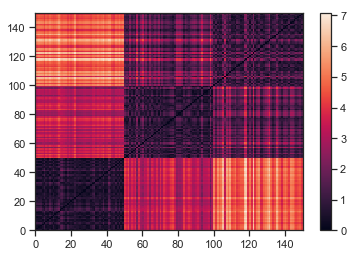

In [9]:
# Source code website : https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html
from scipy.spatial.distance import pdist,squareform
from sklearn import datasets
Theiris = datasets.load_iris()
dist_mat = squareform(pdist(Theiris.data))

N = len(Theiris.data)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Your answer here:
3. 
I'm not quite sure to answer this problem. I think the minimum number of distance is N size of the data set.
4. 
The sorted distance matrix helps in finding clusters and the dense (color) of a cluster or how far the other clusters are.Further, it shows the dissimilarity(color) of the iris class label data.
I can see there is 3 noticeable clusters. One in the bottom left and far from the two other but different in distance.



## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

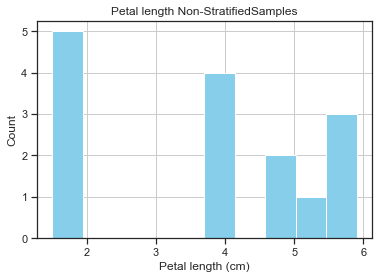

In [53]:
# So we are given a big array (or stream) of numbers (to simplify), and 
#we need to write an efficient function to randomly select k numbers where 1 <= k <= n. 
#Let the input array be stream[].
#source code : 
#http://web.archive.org/web/20141026071430/http://propersubset.com:80/2010/04/choosing-random-elements.html

def reservoir_sampling(stream,M):
    result = []
    N = 0

    for item in stream:
        N += 1
        if len( result ) < M:
            result.append( item )
        else:
            s = int(rand.random() * N)
            if s < M:
                result[s] = item

    return result

reservoir_sampling(Theiris.data,15)
randomList = reservoir_sampling(Theiris.data,15)
a = np.array(randomList)
thepetalLengthSample = [a[0,2],a[1,2],a[2,2],a[3,2],a[4,2],a[5,2],a[6,2]
           ,a[7,2],a[8,2],a[9,2],a[10,2],a[11,2],a[12,2],a[13,2],a[14,2]]

plt.hist(thepetalLengthSample,color = "skyblue")
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.title('Petal length Non-StratifiedSamples')
plt.grid(True)
plt.show()

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

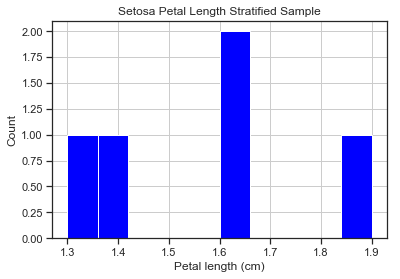

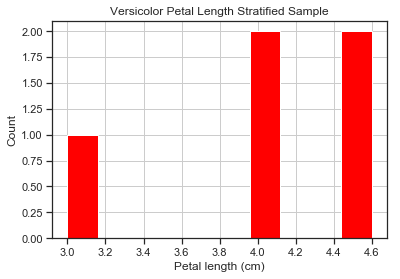

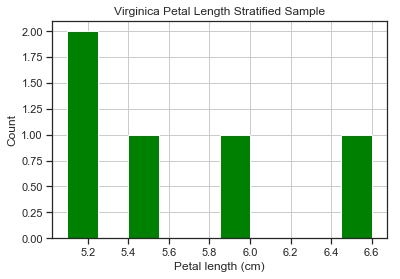

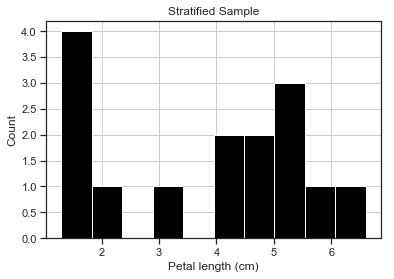

In [59]:
#Q3b 
# This is a quick and dirty method of implementing the class label due to my time constraint. 

theIrisSetosa = Theiris.data[:50]
theIrisVersicolor = Theiris.data[50:100]
theIrisVirginica = Theiris.data[101:150]


irisSetosaSample = reservoir_sampling(theIrisSetosa,5)
listSetosaSample = np.array(irisSetosaSample)

listSetosaPetalLengthSample = [listSetosaSample[0,2],listSetosaSample[1,2],
                               listSetosaSample[2,2],listSetosaSample[3,2],listSetosaSample[4,2]]

plt.hist(listSetosaPetalLengthSample,color = "blue")
plt.title('Setosa Petal Length Stratified Sample')
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

irisVersicolorSample = reservoir_sampling(theIrisVersicolor,5)
listVersicolorSample = np.array(irisVersicolorSample)

listVersicolorPetalLengthSample = [listVersicolorSample[0,2],listVersicolorSample[1,2],
                               listVersicolorSample[2,2],listVersicolorSample[3,2],listVersicolorSample[4,2]]


plt.hist(listVersicolorPetalLengthSample,color = "red")
plt.title('Versicolor Petal Length Stratified Sample')
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

irisVirginicaSample = reservoir_sampling(theIrisVirginica,5)
listVirginicaSample = np.array(irisVirginicaSample)

listVirginicaPetalLengthSample = [listVirginicaSample[0,2],listVirginicaSample[1,2],
                               listVirginicaSample[2,2],listVirginicaSample[3,2],listVirginicaSample[4,2]]

plt.hist(listVirginicaPetalLengthSample,color = "green")
plt.title('Virginica Petal Length Stratified Sample')
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Combining all the class labels into one histogram 
temp = listSetosaPetalLengthSample +  listVersicolorPetalLengthSample + listVirginicaPetalLengthSample 
plt.title('Stratified Sample')
plt.hist(temp,color = "black")
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Your answer here:
3. 
Stratified Sample histogram resembeles more towards the original petal length histogram. The distribution is more consistent with Stratified Sample histogram.